In [19]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
import mjoindices.olr_handling as olr
import mjoindices.omi.wheeler_kiladis_mjo_filter
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\Monday\correction.nc')
ds = f.__xarray_dataarray_variable__
nds = ds.loc[:,20:-20.1,:]

In [20]:
varnds = nds.rolling(time = 91, center = True).var().dropna("time")
a = varnds.values
b = np.sqrt(a)
lat = varnds['lat']
lon = varnds['lon']
time = varnds['time']

sqrtvar = xr.DataArray(b,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])

In [43]:
c = sqrtvar.resample(time ="M").mean(dim="time")
dsmonth = c.resample(time='QS-OCT').mean(dim="time")
NDJ=dsmonth[3::4,:,:]
print(NDJ)
NDJ['time']=NDJ['time.year']
NDJ=NDJ.rename({'time': 'Year'})
NDJ.name = 'olr'

new_ds = NDJ



<xarray.DataArray (time: 41, lat: 17, lon: 144)>
array([[[ 6.09658745,  5.52020367,  5.11592538, ...,  7.26527253,
          6.98549009,  6.7137969 ],
        [ 5.04135614,  4.61138411,  4.28946054, ...,  4.89580935,
          5.62776337,  5.43986286],
        [ 6.42147306,  5.8677495 ,  5.94819074, ...,  6.41750874,
          6.04410717,  5.75375884],
        ...,
        [ 5.19719128,  6.29278702,  7.02479918, ...,  4.79980533,
          4.91428802,  4.68772273],
        [ 4.53509309,  5.69217977,  6.88441277, ...,  3.64074921,
          3.87266249,  3.92070853],
        [ 2.83096471,  3.47044956,  4.54929516, ...,  2.91530139,
          2.7666763 ,  2.4190507 ]],

       [[ 4.03342095,  4.30867969,  3.88885983, ...,  6.37040402,
          6.01063853,  4.88172795],
        [ 3.08091375,  2.77117956,  3.38884261, ...,  5.45515411,
          4.36718536,  3.52457656],
        [ 5.6682892 ,  6.03669425,  6.71066169, ...,  6.24621089,
          5.11717647,  5.11778082],
...
        [ 3.42

In [44]:
sgl= (1983, 1988, 1995, 1998, 2005, 2007, 2010, 2016, 2020)
sgl = np.array(sgl,dtype = 'int32')
sgl =sgl -1981
dbl=(1984, 1999, 2008, 2011, 2017, 2021)
dbl = np.array(dbl,dtype = 'int32')
dbl = dbl -1981
Lasgl = new_ds[sgl,:,:].mean(axis=0)
Ladbl = new_ds[dbl,:,:].mean(axis=0)

In [45]:
new_ds

<xarray.DataArray 'olr' (Year: 41, lat: 17, lon: 144)>
array([[[ 6.09658745,  5.52020367,  5.11592538, ...,  7.26527253,
          6.98549009,  6.7137969 ],
        [ 5.04135614,  4.61138411,  4.28946054, ...,  4.89580935,
          5.62776337,  5.43986286],
        [ 6.42147306,  5.8677495 ,  5.94819074, ...,  6.41750874,
          6.04410717,  5.75375884],
        ...,
        [ 5.19719128,  6.29278702,  7.02479918, ...,  4.79980533,
          4.91428802,  4.68772273],
        [ 4.53509309,  5.69217977,  6.88441277, ...,  3.64074921,
          3.87266249,  3.92070853],
        [ 2.83096471,  3.47044956,  4.54929516, ...,  2.91530139,
          2.7666763 ,  2.4190507 ]],

       [[ 4.03342095,  4.30867969,  3.88885983, ...,  6.37040402,
          6.01063853,  4.88172795],
        [ 3.08091375,  2.77117956,  3.38884261, ...,  5.45515411,
          4.36718536,  3.52457656],
        [ 5.6682892 ,  6.03669425,  6.71066169, ...,  6.24621089,
          5.11717647,  5.11778082],
...
        [ 3.42004673,  3.70238534,  4.42674964, ...,  2.99997365,
          2.58420335,  2.93176773],
        [ 3.20465938,  3.85305242,  4.33735656, ...,  2.82901679,
          3.23769288,  2.89075482],
        [ 2.67892969,  3.05850812,  3.09080427, ...,  3.14244524,
          3.19184585,  3.52737365]],

       [[ 6.52596888,  6.17215551,  7.07681613, ...,  6.96442507,
          7.18499467,  6.61474607],
        [ 6.52465011,  6.3485774 ,  6.19233674, ...,  8.61311148,
          8.6931142 ,  6.67444793],
        [ 5.57204435,  5.05862949,  3.9004526 , ..., 10.98114789,
          9.32967058,  7.6401707 ],
        ...,
        [ 3.63368268,  3.8764749 ,  5.27212938, ...,  2.3524197 ,
          3.20968338,  2.78949491],
        [ 3.48847874,  3.64556618,  4.98647392, ...,  2.3217219 ,
          2.9116197 ,  2.89042604],
        [ 2.9155422 ,  2.9916242 ,  3.59863274, ...,  2.00060286,
          2.41753994,  2.5307338 ]]])
Coordinates:
  * Year     (Year) int64 1981 1982 1983 1984 1985 ... 2017 2018 2019 2020 2021
  * lat      (lat) float32 20.0 17.5 15.0 12.5 10.0 ... -12.5 -15.0 -17.5 -20.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 



C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

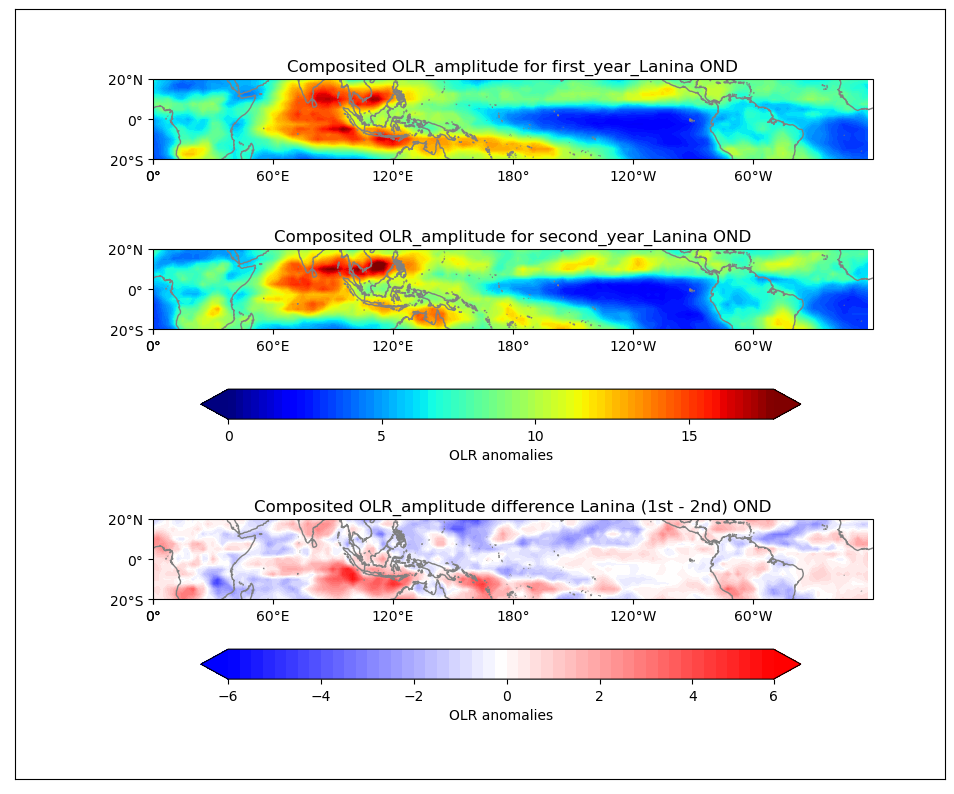

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
#figur 1
fig,ax1 = plt.subplots(figsize=(12,10)) 
plt.xticks([])
plt.yticks([])
ax1 = fig.add_axes([0.24, 0.47, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE,color='grey') 
ax1.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.title.set_text('Composited OLR_amplitude for first_year_Lanina OND')
c1 = ax1.contourf(lon,lat,Lasgl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)
fig.colorbar(c1, cax=fig.add_axes([0.28, 0.47, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(0,18.1,5),
             shrink=0.7)

# figure 2
ax = fig.add_axes([0.24, 0.3, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_amplitude for second_year_Lanina OND')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)


#figure 3
a = Lasgl-Ladbl 
    
ax0 = fig.add_axes([0.24, 0.03, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax0.set_extent(img_extent, crs=ccrs.PlateCarree())
ax0.add_feature(cfeature.COASTLINE,color='grey') 
ax0.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax0.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.yaxis.set_major_formatter(lat_formatter)
ax0.title.set_text('Composited OLR_amplitude difference Lanina (1st - 2nd) OND')

c0 = ax0.contourf(lon,lat,a,
                levels=np.arange(-6,6,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)


fig.colorbar(c0, cax=fig.add_axes([0.28, 0.21, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-6,6.1,2),
             shrink=0.7)

In [17]:
Ladbl.max()

<xarray.DataArray 'olr' ()>
array(20.55556556)